## Setup

### Melakukan Pengecekan apakah Memiliki akses ke GPU

In [1]:
!nvidia-smi

Sun Dec 29 14:06:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Membuat `HOME` constant untuk mempermudah manage dataset

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


## Model

Import Dataset Roboflow

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="8MTL2TrfrrAbNVS9LyZZ")
project = rf.workspace("aminathaker44").project("hand_num-rdlr8")
version = project.version(37)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 52.4MB/s]
New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/hand_num-37/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

Hasil disimpan di `{HOME}/runs/detect/train/`. Berikut adalah hasilnya

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1735481636.63158b474c0f.2240.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch10280.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch10281.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch10282.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


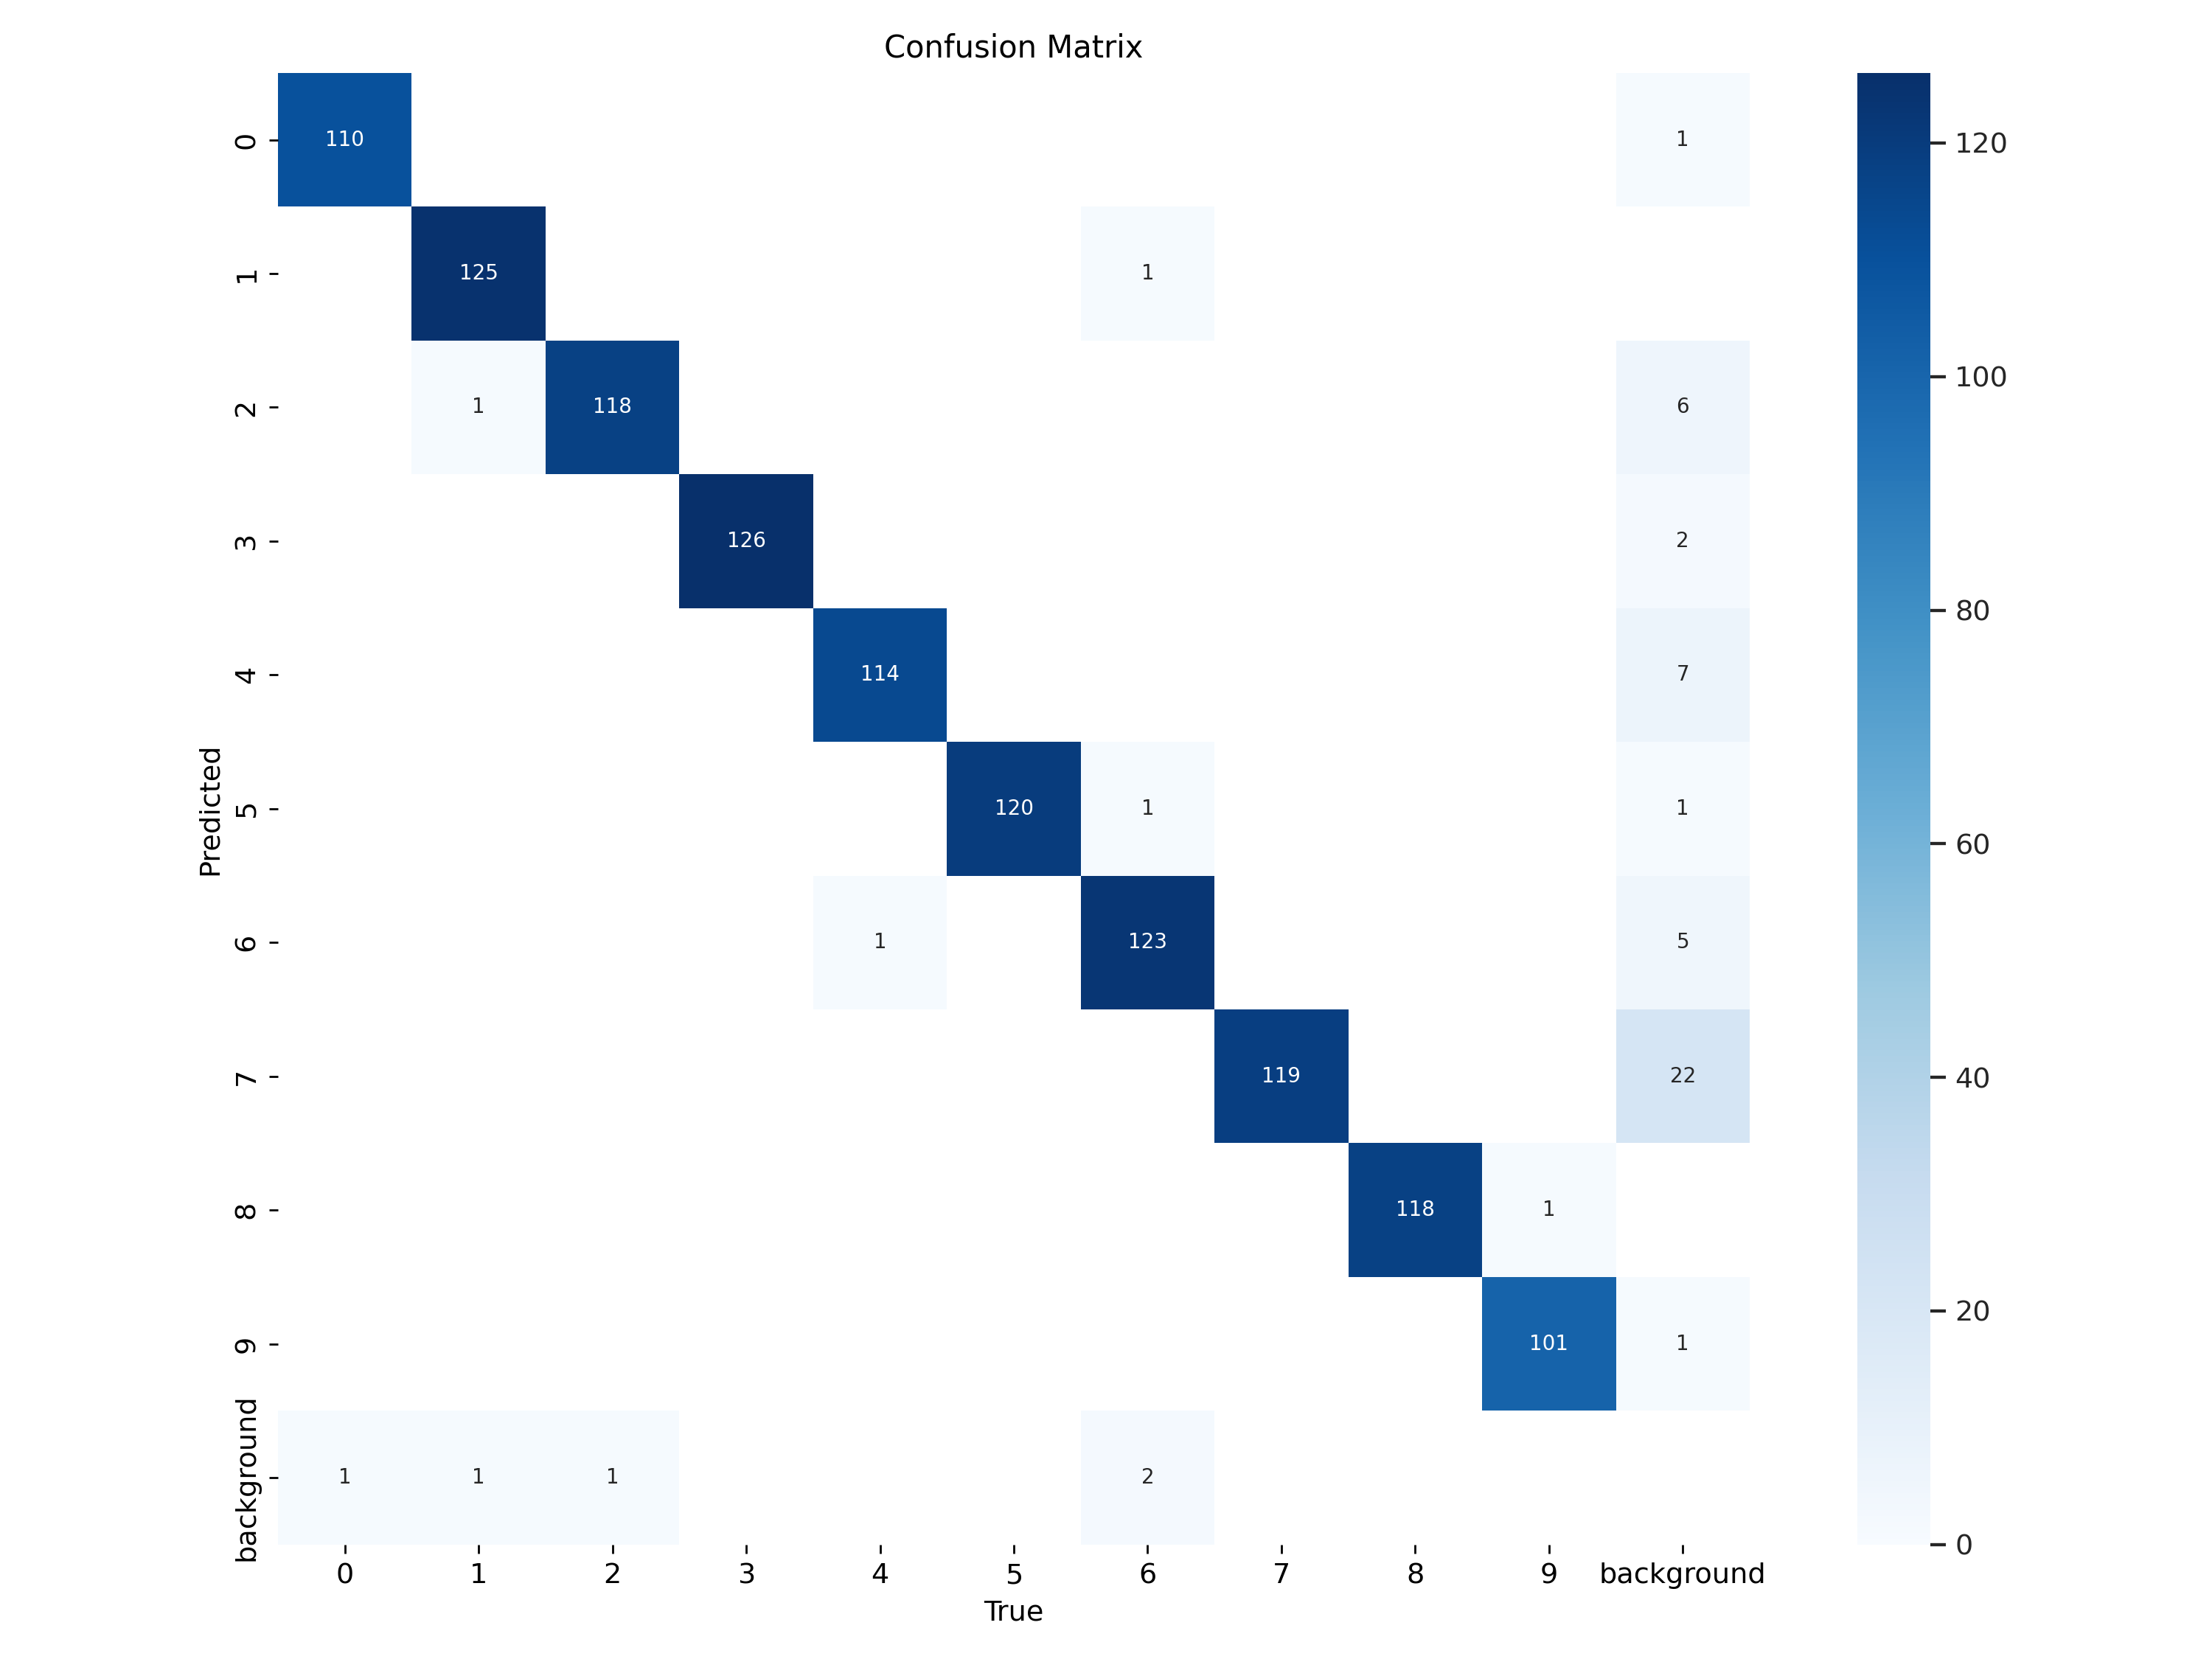

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

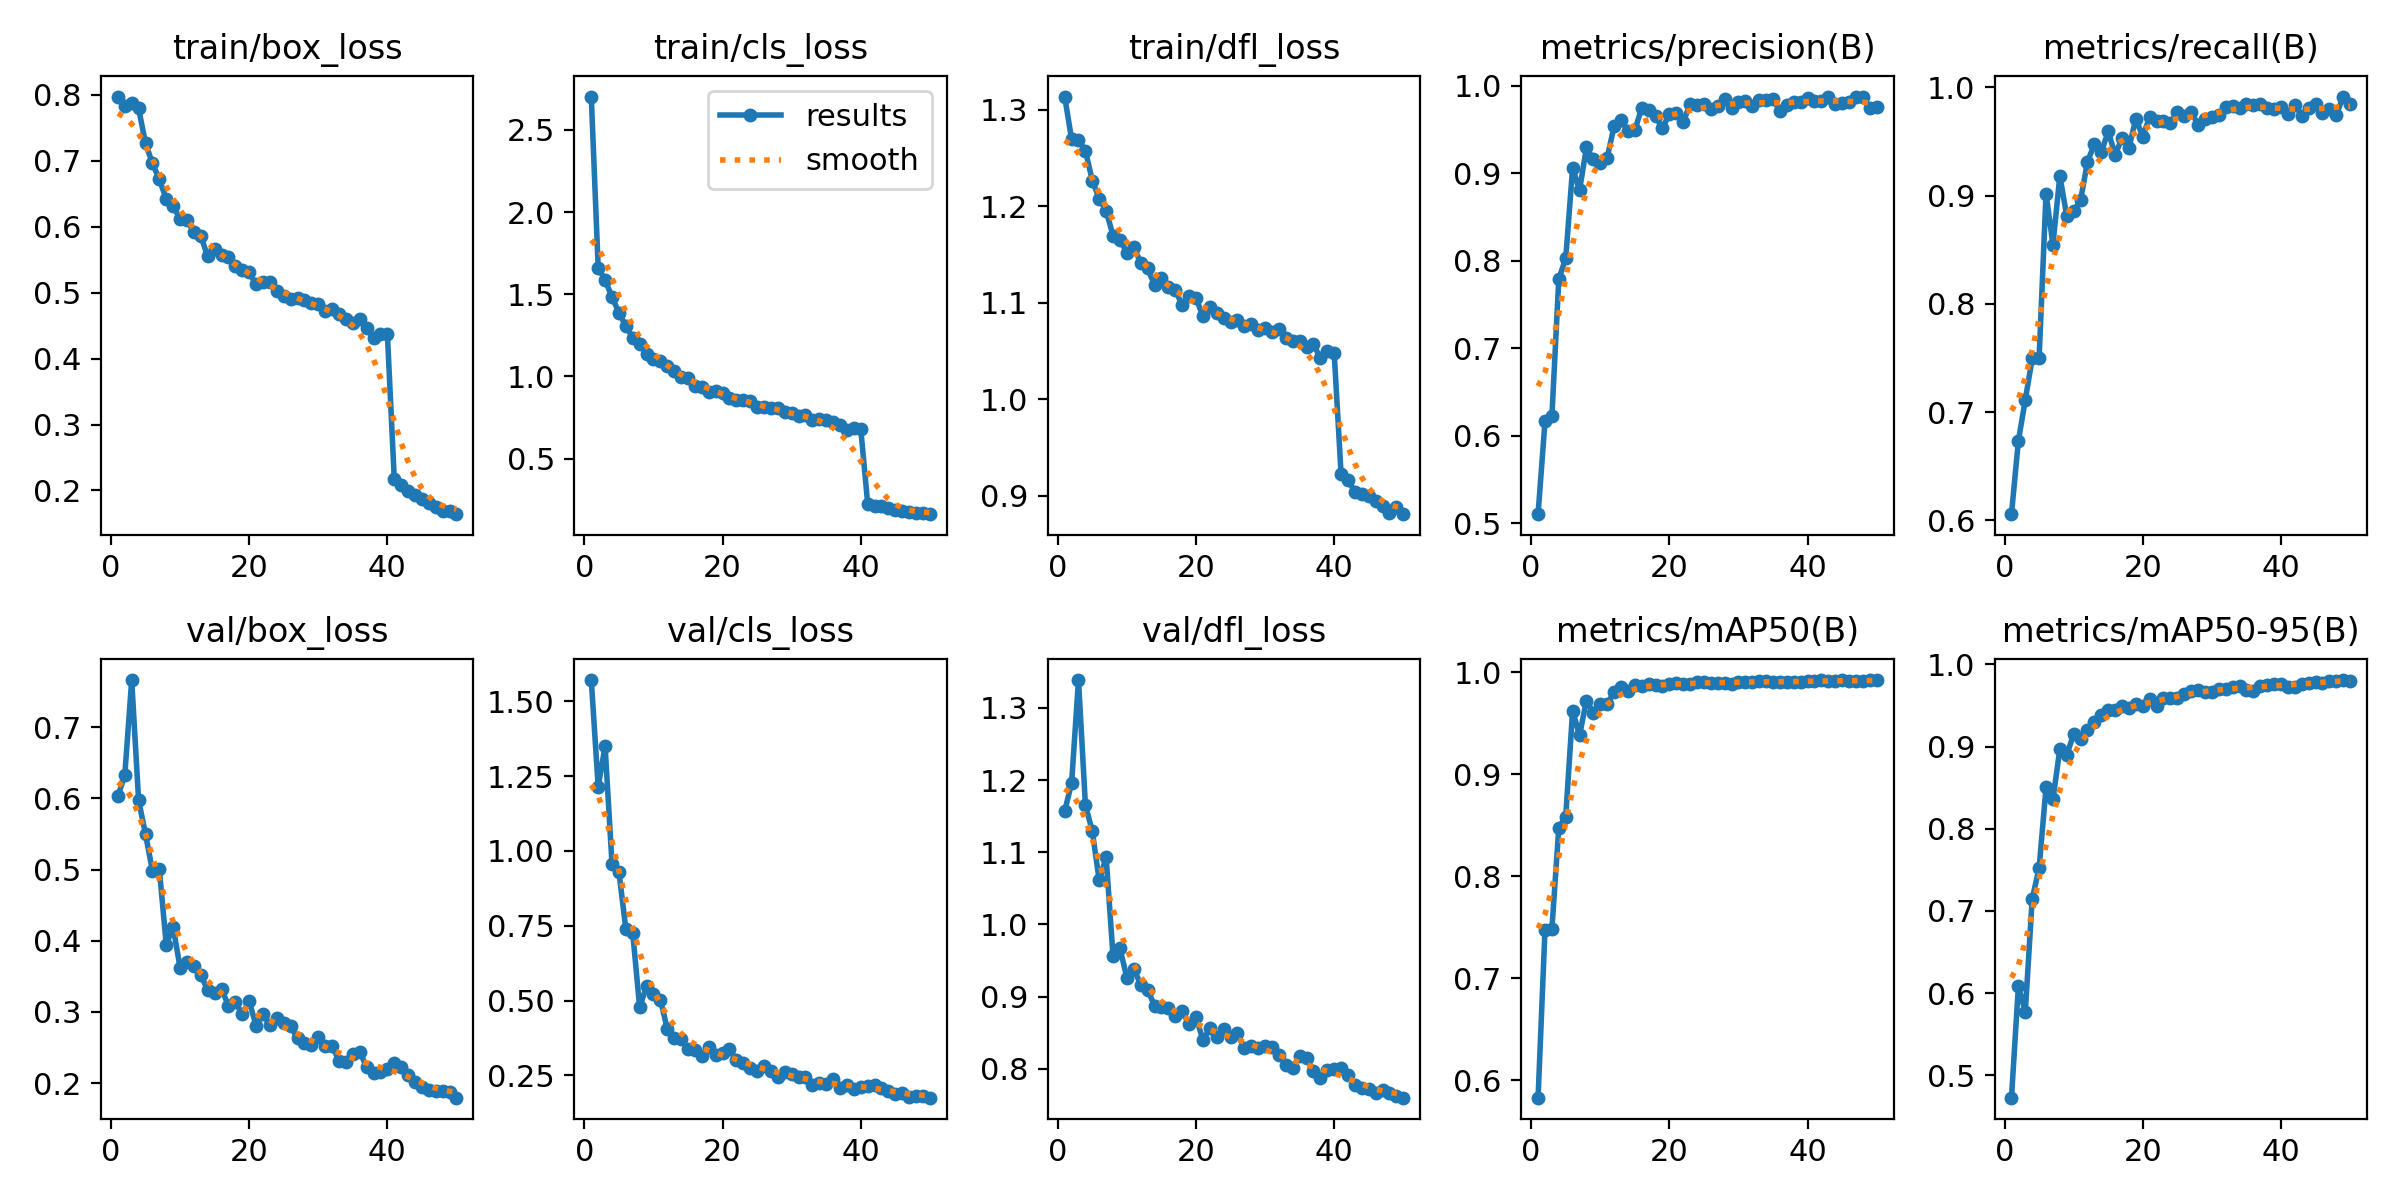

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

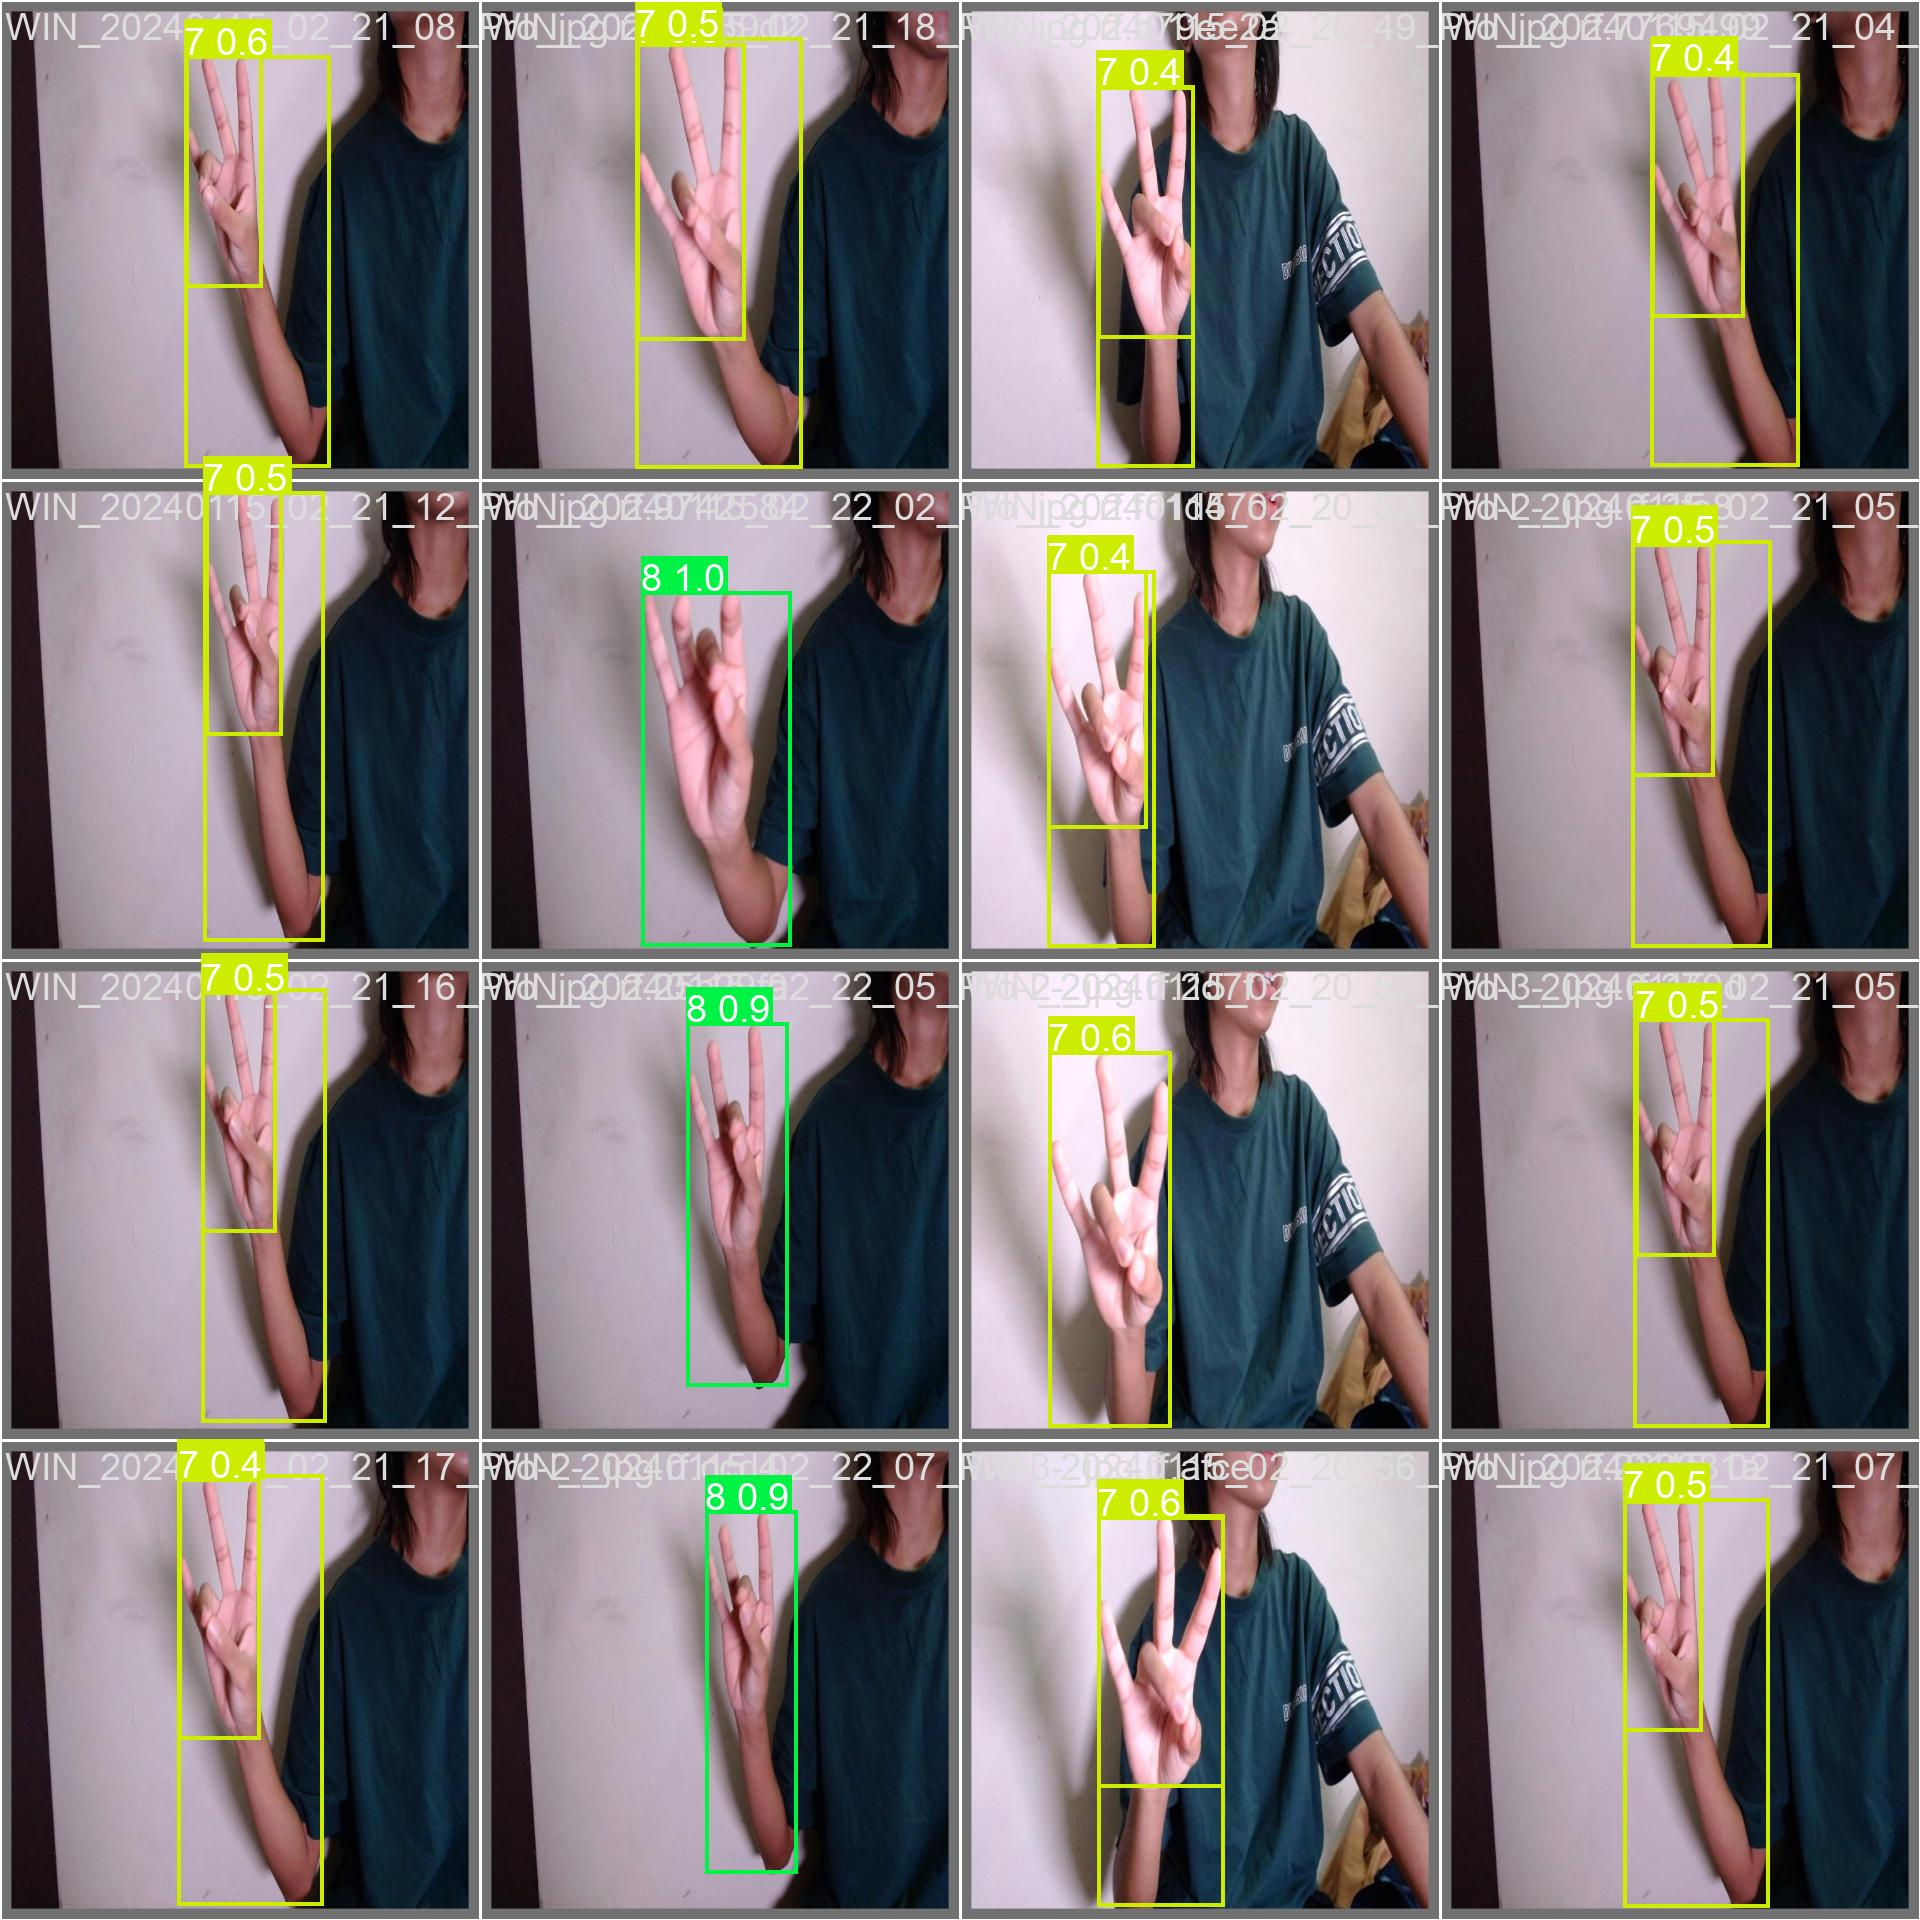

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validasi Model

In [11]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/hand_num-37/valid/labels.cache... 1182 images, 0 backgrounds, 0 corrupt: 100% 1182/1182 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 74/74 [00:16<00:00,  4.49it/s]
                   all       1182       1184      0.974      0.991      0.992      0.981
                     0        111        111      0.984      0.991      0.993      0.979
                     1        127        127       0.99      0.984      0.995      0.976
                     2        119        119      0.951      0.979      0.993      0.974
                     3        126        126      0.983          1      0.995      0.985
                     4        115        115      0.965      0.991      0.994      0.985
                     5        120    

## Inference menggunakan Model

In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs

image 1/583 /content/datasets/hand_num-37/test/images/0_men-106-_JPG.rf.1cb9e7f912d7f45fa9e2cd633fdd22d2.jpg: 640x640 1 0, 15.6ms
image 2/583 /content/datasets/hand_num-37/test/images/0_men-107-_JPG.rf.a223c51f8643334d9e9cf465cb0c6510.jpg: 640x640 1 0, 15.7ms
image 3/583 /content/datasets/hand_num-37/test/images/0_men-117-_JPG.rf.b6e42591011223bb04c871bd96f5aba1.jpg: 640x640 1 0, 15.6ms
image 4/583 /content/datasets/hand_num-37/test/images/0_men-15-_JPG.rf.6e6f2b6718293993728cd6e34ec82f64.jpg: 640x640 1 0, 15.6ms
image 5/583 /content/datasets/hand_num-37/test/images/0_men-152-_JPG.rf.915d5afe8b32f8d1b410702e4652402e.jpg: 640x640 1 0, 15.6ms
image 6/583 /content/datasets/hand_num-37/test/images/0_men-156-_JPG.rf.f3199c5d7a362db563d0ccf18b09a053.jpg: 640x640 1 0, 15.6ms
image 7/583 /content/datasets/hand_num-37/test/images/

Berikut adalah beberapa hasil Inference

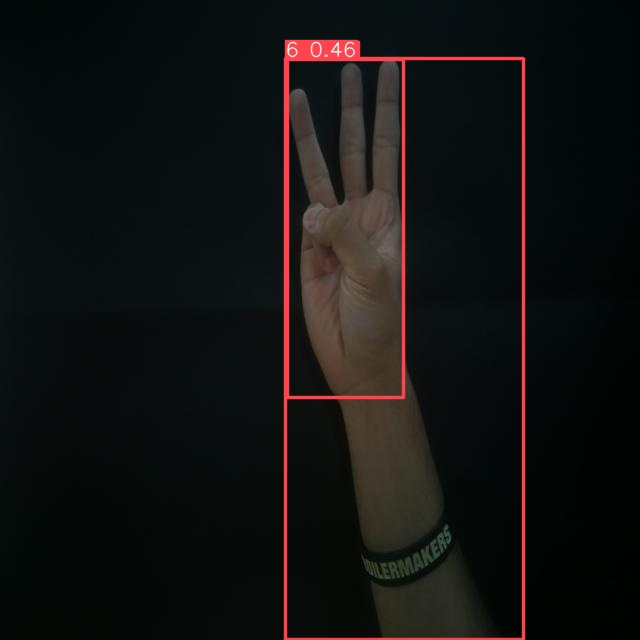

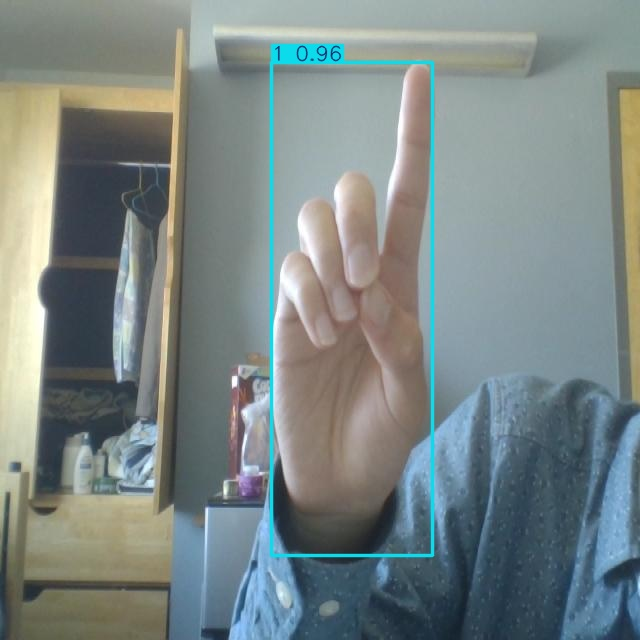

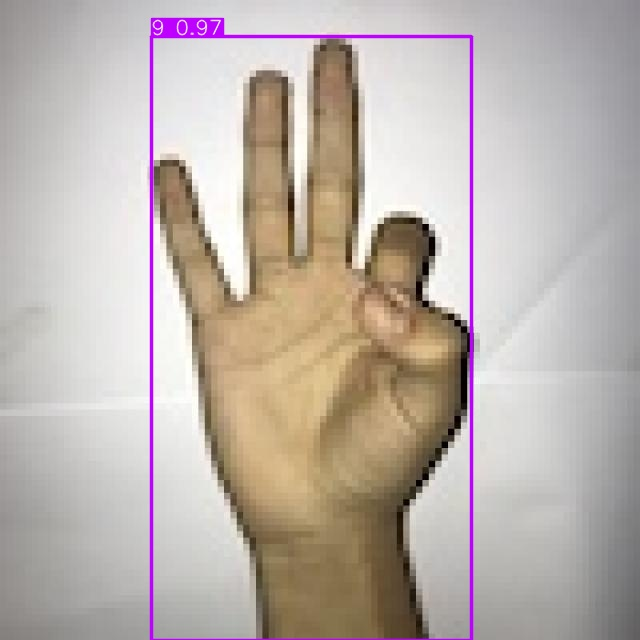

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")